In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('jewellery.csv')

In [3]:
df.head()

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
Age              505 non-null int64
Income           505 non-null int64
SpendingScore    505 non-null float64
Savings          505 non-null float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


In [5]:
df.isnull().sum()

Age              0
Income           0
SpendingScore    0
Savings          0
dtype: int64

In [6]:
# so there is no null value

In [7]:
df.dtypes

Age                int64
Income             int64
SpendingScore    float64
Savings          float64
dtype: object

In [8]:
df.describe()

,Age,Income,SpendingScore,Savings
count,505.000000,505.000000,505.000000,505.000000
mean,59.019802,75513.291089,0.505083,11862.455867
std,24.140043,35992.922184,0.259634,4949.229253
min,17.000000,12000.000000,0.000000,0.000000
25%,34.000000,34529.000000,0.304792,6828.709702
50%,59.000000,75078.000000,0.368215,14209.932802
75%,85.000000,107100.000000,0.768279,16047.268331
max,97.000000,142000.000000,1.000000,20000.000000


Text(0.5, 1.0, 'Age vs Income')

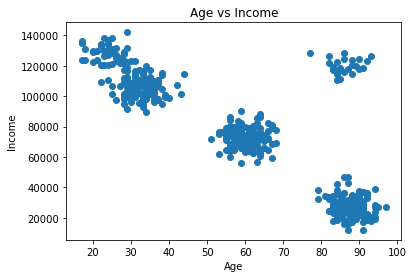

In [9]:
# simple Plot
plt.scatter(df['Age'],df['Income'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Age vs Income')

In [10]:
# Groups based on age and income
df.groupby(['Age','Income']).size()

Age  Income
17   123828    1
     134734    1
     134966    1
     136255    1
18   123718    1
              ..
94   27771     1
     28352     1
     38923     1
95   27038     1
97   27271     1
Length: 505, dtype: int64

###  how to find the optimal k for the cluster
 + elbow method
 + silhouette method
 

In [11]:
# Elbow Method
# Use the sum of squared distance and find where threr is a bent
# working with kmean
from sklearn.cluster import KMeans


sum_of_sqr_distance =[]
k_range = range(1,15)
for k in k_range:
    km_model2 = KMeans(n_clusters=k)
    km_model2.fit(df)
    sum_of_sqr_distance.append(km_model2.inertia_)


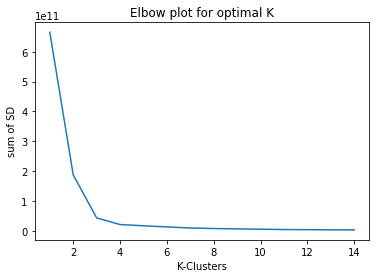

In [12]:
# plot elbow method
plt.plot(k_range,sum_of_sqr_distance)
plt.xlabel('K-Clusters')
plt.ylabel('sum of SD')
plt.title('Elbow plot for optimal K')
plt.show()

In [13]:
# Using silhouette method for optimal K

In [14]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [15]:
range_n_clusters = [2,3,4,5,6]

for n_clusters in range_n_clusters:
    km_model3 = KMeans(n_clusters=n_clusters)
    preds = km_model3.fit_predict(df)
    center = km_model3.cluster_centers_
    
    score = silhouette_score(df,preds)
    print("For n_clusters = {}, silhouette_score is {}".format(n_clusters,score))




For n_clusters = 2, silhouette_score is 0.6547312337772452
For n_clusters = 3, silhouette_score is 0.7393168523275075
For n_clusters = 4, silhouette_score is 0.7207226008574877
For n_clusters = 5, silhouette_score is 0.6382039175207863
For n_clusters = 6, silhouette_score is 0.5778227894898563


#### we chose higer value "silhouette_score" and ref the scatter plot

+ we get k vlue

In [16]:
km3 = KMeans(n_clusters=4)

y_pred = km3.fit_predict(df)

y_pred

array([2, 2, 2, 2, 1, 0, 2, 1, 1, 1, 3, 3, 3, 3, 2, 0, 2, 1, 1, 0, 3, 0,
       2, 1, 0, 0, 0, 2, 1, 2, 2, 2, 1, 2, 3, 2, 1, 2, 3, 3, 2, 1, 0, 2,
       2, 0, 0, 0, 3, 2, 1, 3, 0, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 0, 0, 2, 2, 3, 1, 1, 3, 2, 3, 2, 2, 0, 2, 3, 2, 1, 1, 3, 3, 2,
       2, 2, 2, 2, 0, 1, 2, 0, 3, 2, 2, 3, 3, 0, 3, 0, 3, 1, 1, 3, 3, 2,
       1, 3, 2, 3, 3, 3, 2, 3, 0, 1, 3, 1, 1, 1, 3, 0, 2, 1, 2, 2, 3, 2,
       3, 2, 0, 1, 0, 0, 2, 3, 1, 2, 2, 0, 2, 0, 2, 0, 2, 1, 2, 3, 1, 2,
       1, 3, 3, 2, 1, 2, 3, 1, 2, 3, 1, 3, 1, 2, 3, 2, 1, 2, 3, 2, 1, 2,
       2, 1, 1, 1, 2, 2, 3, 0, 0, 1, 3, 2, 2, 2, 3, 1, 2, 2, 2, 1, 0, 3,
       1, 1, 1, 3, 2, 3, 2, 3, 2, 1, 0, 2, 1, 1, 1, 1, 2, 1, 3, 0, 3, 1,
       2, 2, 3, 1, 0, 0, 3, 2, 2, 1, 2, 2, 1, 2, 2, 2, 3, 2, 3, 3, 0, 2,
       2, 2, 0, 2, 3, 1, 0, 0, 0, 1, 2, 3, 1, 1, 3, 3, 2, 2, 0, 2, 2, 1,
       2, 1, 3, 0, 2, 3, 1, 2, 1, 1, 3, 2, 1, 1, 2, 2, 1, 3, 3, 0, 3, 1,
       1, 3, 0, 1, 1, 0, 2, 3, 3, 2, 3, 1, 1, 3, 2,

In [17]:
# find number of cluster 
# best method find no.of ceter in sys

km3.cluster_centers_

array([[4.08750000e+01, 1.26031667e+05, 6.54598429e-01, 7.28792610e+03],
       [8.77755102e+01, 2.78661020e+04, 3.28800461e-01, 1.66592614e+04],
       [5.99615385e+01, 7.23328462e+04, 7.71295985e-01, 6.89089329e+03],
       [3.54230769e+01, 1.05228392e+05, 3.02152694e-01, 1.49378365e+04]])

In [18]:
df.head()

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


In [19]:
# ther is 4 pair value is presrnt so we are correct
# we add clusters value in real data set 

df['clusters']= y_pred

In [20]:
df.head()
# ok

,Age,Income,SpendingScore,Savings,clusters
0,58,77769,0.791329,6559.829923,2
1,59,81799,0.791082,5417.661426,2
2,62,74751,0.702657,9258.992965,2
3,59,74373,0.765680,7346.334504,2
4,87,17760,0.348778,16869.507130,1


In [21]:
df['clusters'].unique()

array([2, 1, 0, 3], dtype=int64)

In [22]:
# we just see what is shown in scatter plot


df0 =df[df['clusters']==0]
df1 =df[df['clusters']==1]
df2 =df[df['clusters']==2]
df3 =df[df['clusters']==3]


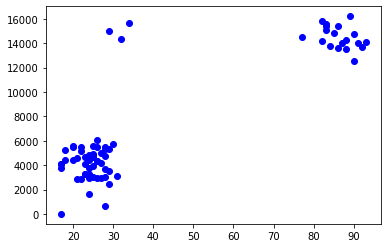

In [23]:
plt.scatter(df0['Age'],df0['Savings'],color='b')

Text(0, 0.5, 'Cluster')

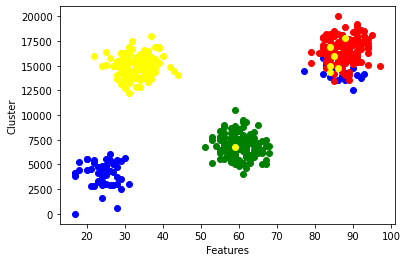

In [24]:
plt.scatter(df0['Age'],df0['Savings'],color='b')
plt.scatter(df1['Age'],df1['Savings'],color='r')
plt.scatter(df2['Age'],df2['Savings'],color='g')
plt.scatter(df3['Age'],df3['Savings'],color='yellow')
plt.xlabel('Features')
plt.ylabel('Cluster')

In [25]:
km3.cluster_centers_

array([[4.08750000e+01, 1.26031667e+05, 6.54598429e-01, 7.28792610e+03],
       [8.77755102e+01, 2.78661020e+04, 3.28800461e-01, 1.66592614e+04],
       [5.99615385e+01, 7.23328462e+04, 7.71295985e-01, 6.89089329e+03],
       [3.54230769e+01, 1.05228392e+05, 3.02152694e-01, 1.49378365e+04]])

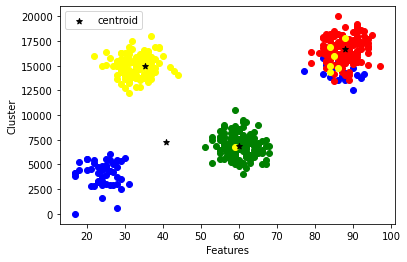

In [26]:
plt.scatter(df0['Age'],df0['Savings'],color='b')
plt.scatter(df1['Age'],df1['Savings'],color='r')
plt.scatter(df2['Age'],df2['Savings'],color='g')
plt.scatter(df3['Age'],df3['Savings'],color='yellow')

plt.scatter(km3.cluster_centers_[:,0],
            km3.cluster_centers_[:,3],
            color ='black',
           marker='*',
            label='centroid')

plt.xlabel('Features')
plt.ylabel('Cluster')
plt.legend()

In [27]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
def silhouette_plot(X, y, n_clusters, ax=None):
	if ax is None:
		ax = plt.gca()
		# Compute the silhouette scores for each sample
		silhouette_avg = silhouette_score(X, y)
		sample_silhouette_values = silhouette_samples(X, y)
		y_lower = padding = 2
		for i in range(n_clusters):
	# Aggregate the silhouette scores for samples belonging to
			ith_cluster_silhouette_values = sample_silhouette_values[y == i]
			ith_cluster_silhouette_values.sort()
			size_cluster_i = ith_cluster_silhouette_values.shape[0]
			y_upper = y_lower + size_cluster_i
			color = cm.nipy_spectral(float(i) / n_clusters)
			ax.fill_betweenx(np.arange(y_lower, y_upper),
							0,ith_cluster_silhouette_values,
							facecolor=color,
							edgecolor=color,
							alpha=0.7)
			# Label the silhouette plots with their cluster numbers at the middle
			ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i + 1))
			# Compute the new y_lower for next plot
			y_lower = y_upper + padding
		ax.set_xlabel("The silhouette coefficient values")
		ax.set_ylabel("Cluster label")
		# The vertical line for average silhoutte score of all the values
		ax.axvline(x=silhouette_avg, c='r', alpha=0.8, lw=0.8, ls='-')
		ax.annotate('Average',
					xytext=(silhouette_avg, y_lower * 1.025),
					xy=(0, 0),
					ha='center',
					alpha=0.8,
					c='r')
		ax.set_yticks([]) # Clear the yaxis labels / ticks
		ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
		ax.set_ylim(0, y_upper + 1)
		ax.set_xlim(-0.075, 1.0)
		return ax

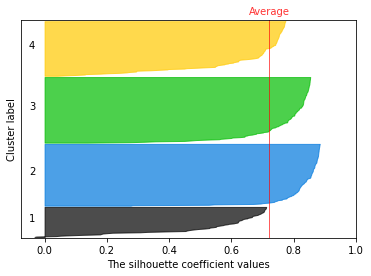

In [28]:
silhouette_plot(df,y_pred,4,ax=None)

#The silhouette score is a measure of how similar an object is to its
# own cluster (cohesion) compared to other clusters (separation)

In [29]:
preds

array([2, 2, 2, 2, 0, 3, 2, 5, 5, 0, 4, 1, 1, 4, 2, 3, 2, 5, 5, 4, 1, 3,
       2, 0, 4, 3, 3, 2, 5, 2, 2, 2, 0, 2, 1, 2, 0, 2, 1, 4, 2, 0, 3, 2,
       2, 3, 4, 3, 1, 2, 0, 1, 3, 0, 2, 0, 1, 5, 0, 5, 5, 0, 5, 2, 2, 2,
       0, 3, 3, 2, 2, 4, 5, 5, 4, 2, 1, 2, 2, 3, 2, 4, 1, 0, 5, 1, 1, 2,
       1, 2, 2, 2, 3, 5, 2, 3, 1, 2, 2, 4, 4, 3, 4, 3, 1, 5, 0, 4, 4, 2,
       5, 1, 2, 1, 1, 1, 2, 4, 3, 5, 1, 0, 5, 5, 4, 3, 2, 5, 2, 2, 4, 2,
       1, 2, 3, 5, 3, 3, 2, 4, 5, 2, 2, 3, 2, 3, 2, 3, 2, 5, 2, 4, 5, 2,
       0, 4, 4, 2, 5, 2, 4, 5, 2, 1, 0, 1, 5, 2, 4, 2, 5, 2, 1, 2, 5, 2,
       2, 0, 5, 0, 2, 2, 4, 3, 3, 0, 1, 2, 2, 2, 1, 0, 2, 2, 2, 5, 3, 4,
       0, 0, 0, 1, 2, 1, 2, 4, 2, 5, 3, 2, 0, 0, 5, 0, 2, 0, 1, 3, 1, 0,
       2, 2, 4, 5, 4, 3, 1, 2, 2, 5, 2, 2, 5, 2, 2, 2, 1, 2, 4, 1, 3, 2,
       2, 2, 4, 2, 4, 0, 3, 3, 3, 5, 2, 4, 0, 0, 1, 4, 2, 2, 4, 2, 2, 5,
       2, 0, 4, 3, 2, 4, 0, 2, 0, 0, 1, 2, 0, 0, 2, 2, 5, 1, 4, 3, 4, 5,
       0, 1, 4, 5, 5, 3, 2, 4, 4, 2, 4, 5, 5, 1, 2,

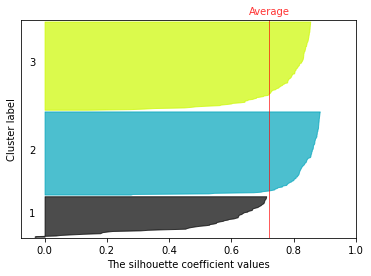

In [30]:
silhouette_plot(df,y_pred,3,ax=None)

In [31]:
range_n_clusters = [2,3,4,5,6]

for n_clusters in range_n_clusters:
    km_model3 = KMeans(n_clusters=n_clusters)
    preds = km_model3.fit_predict(df)
    center = km_model3.cluster_centers_
    
    score = silhouette_score(df,preds)
    print("For n_clusters = {}, silhouette_score is {}".format(n_clusters,score))




For n_clusters = 2, silhouette_score is 0.6547312334127108
For n_clusters = 3, silhouette_score is 0.7393168513571193
For n_clusters = 4, silhouette_score is 0.720722603555249
For n_clusters = 5, silhouette_score is 0.6777125604326769
For n_clusters = 6, silhouette_score is 0.5783063041894917


In [32]:
N=10
a = range(2,N+1,1)
list(a)

[2, 3, 4, 5, 6, 7, 8, 9, 10]

In [192]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score





def sil_text(X,u,v,N):
    
   
    a = range(2,N+1,1)
    range_n_clusters =list(a)
    
    for n_clusters in range_n_clusters:
        
        
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)
        y = cluster_labels

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        
            # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(u,v, marker='.', lw=0, alpha=0.7, c=colors, edgecolor='k')
        
       
        
        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        
        
    

        
        
        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')
    plt.show()


For n_clusters = 2 The average silhouette_score is : 0.6547312334127108
For n_clusters = 3 The average silhouette_score is : 0.7393168513571193


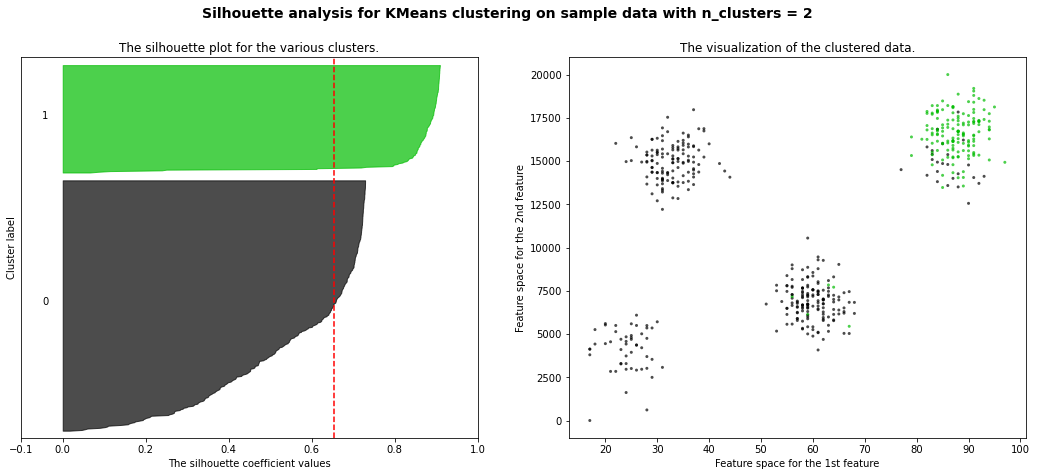

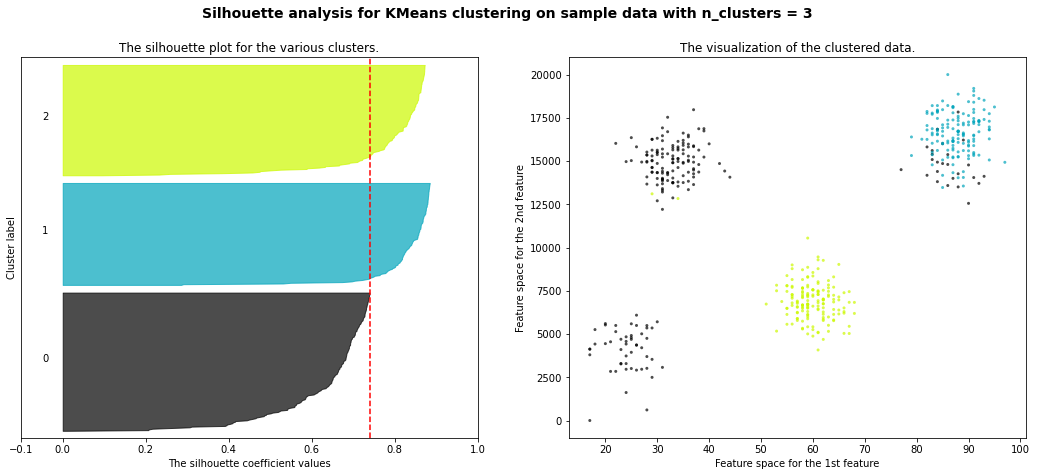

In [193]:
sil_text(X=df,u=df['Age'],v=df['Savings'],N=3)

# DBSCAN
+ DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise
+ It refers to an unsupervised learning methods that identify distinctive groups/clusters in the data, based on the idea that a cluster in data space is a contiguous region of high point density, separated from other such clusters by contiguous regions of low point density.(kdnuggets)
+ 

+ DBSCAN is a base algorithm for density-based clustering. 
+ It can discover clusters of different shapes and sizes from a large amount of data

#### Usefulness
+ Unsupervised ML
+ Outlier Detection
+ Noise detection


#### Terms
The DBSCAN algorithm uses two parameters:
+ eps (ε): A distance measure that will be used to locate the points in the neighborhood of any point.

+ minPts: The minimum number of points (a threshold) clustered together for a region to be considered dense.
    - minPt >= Dimensions of dataset + 1

+ Core point — This is a point that has at least m points within distance n from itself.
+ Border — This is a point that has at least one Core point at a distance n.
+ Noise — This is a point that is neither a Core nor a Border. And it has less than m points within distance n from itself.

These parameters can be understood if we explore two concepts called Density Reachability and Density Connectivity.

Reachability in terms of density establishes a point to be reachable from another if it lies within a particular distance (eps) from it.

Connectivity, on the other hand, involves a transitivity based chaining-approach to determine whether points are located in a particular cluster. For example, p and q points could be connected if p->r->s->t->q, where a->b means b is in the neighborhood of a.







In [195]:
# second type 

df = pd.read_csv('jewellery.csv')

In [196]:
df.head()

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


In [197]:
# Scale our data
from sklearn.preprocessing import StandardScaler

In [198]:
X = StandardScaler().fit_transform(df)

In [200]:
X.shape

(505, 4)

In [204]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.3,min_samples=10)

y_cluster_abs = dbscan.fit_predict(X)

y_cluster_abs

array([ 0,  0,  0,  0,  1,  4,  0,  1,  1,  1, -1,  2,  2,  2,  0,  3,  0,
        1,  1,  3,  2,  3,  0,  1, -1,  4, -1,  0,  1,  0,  0,  0,  1,  0,
        2,  0,  1,  0,  2,  2,  0,  1,  4,  0,  0,  4,  3,  4,  2,  0,  1,
        2,  4,  1,  0,  1,  2,  1,  1,  1,  1,  1,  1,  0,  0,  0,  1, -1,
        4,  0,  0,  2,  1,  1,  2,  0,  2,  0,  0,  4,  0, -1,  0,  1,  1,
        2,  2,  0,  0,  0,  0,  0,  4,  1,  0,  4,  2,  0,  0,  2,  2,  4,
        2,  4,  2,  1, -1,  2,  2,  0,  1,  2,  0,  2,  2,  2,  0,  2, -1,
        1,  2,  1,  1,  1,  2,  3,  0,  1,  0,  0,  2,  0,  2,  0,  4,  1,
       -1,  4,  0,  2,  1,  0,  0,  4,  0,  4,  0, -1,  0,  1,  0,  2,  1,
        0,  1,  3,  2,  0,  1,  0,  2,  1,  0,  2, -1,  2,  1,  0,  2,  0,
        1,  0,  2,  0,  1,  0,  0,  1,  1,  1,  0,  0,  2,  4,  4,  1,  2,
        0,  0,  0,  2,  1,  0,  0,  0,  1, -1,  2,  1,  1,  1,  2,  0,  2,
        0,  2,  0,  1,  4,  0,  1,  1, -1,  1,  0,  1,  2,  4,  2,  1,  0,
        0,  2,  1,  2,  4

In [205]:
# number of uniq cluster
set(y_cluster_abs)

{-1, 0, 1, 2, 3, 4}

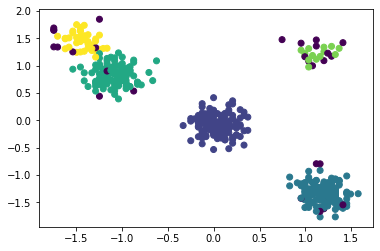

In [207]:

# Non Spherical Data
plt.scatter(X[:,0],X[:,1],c=y_cluster_abs)

In [209]:
# number of cluster
label = dbscan.labels_
n_clusters_ = len(set(label))-(1 if -1 in label else 0)

n_clusters_

5

In [210]:
n_noise = list(dbscan.labels_).count(-1)
n_noise

30


### Clustering using BIRCH

+ BIRCH stands for Balanced Iterative Reducing and Clustering using Hierarchies
+ It is a hierarchical clustering algorithm. 
+ It provides a memory-efficient clustering method for large datasets.
+ Very good for large dataset
+ Clustering is conducted without scanning all points in a dataset. 
+ The BIRCH algorithm creates Clustering Features (CF) Tree for a given dataset and CF contains the number of sub-clusters that holds only a necessary part of the data. Thus the method does not require to memorize the entire dataset.


#### Terms
+  branching_factor: it defines the number of sub-clusters and 
+ threshold: it sets the limit between the sample and sub-cluster.


#### Benefit
+ Useful for large dataset
+ BIRCH can work with any given amount of memory, and the I/O complexity is a little more than one scan of data.

In [211]:
from sklearn.cluster import Birch

In [213]:
brich_model = Birch(branching_factor=100,threshold=0.5,n_clusters=4)
brich_model.fit(df)

Birch(branching_factor=100, compute_labels=True, copy=True, n_clusters=4,
      threshold=0.5)

In [215]:
y_cluss_brich = birch_model.predict(df)

y_cluster_abs

array([ 0,  0,  0,  0,  1,  4,  0,  1,  1,  1, -1,  2,  2,  2,  0,  3,  0,
        1,  1,  3,  2,  3,  0,  1, -1,  4, -1,  0,  1,  0,  0,  0,  1,  0,
        2,  0,  1,  0,  2,  2,  0,  1,  4,  0,  0,  4,  3,  4,  2,  0,  1,
        2,  4,  1,  0,  1,  2,  1,  1,  1,  1,  1,  1,  0,  0,  0,  1, -1,
        4,  0,  0,  2,  1,  1,  2,  0,  2,  0,  0,  4,  0, -1,  0,  1,  1,
        2,  2,  0,  0,  0,  0,  0,  4,  1,  0,  4,  2,  0,  0,  2,  2,  4,
        2,  4,  2,  1, -1,  2,  2,  0,  1,  2,  0,  2,  2,  2,  0,  2, -1,
        1,  2,  1,  1,  1,  2,  3,  0,  1,  0,  0,  2,  0,  2,  0,  4,  1,
       -1,  4,  0,  2,  1,  0,  0,  4,  0,  4,  0, -1,  0,  1,  0,  2,  1,
        0,  1,  3,  2,  0,  1,  0,  2,  1,  0,  2, -1,  2,  1,  0,  2,  0,
        1,  0,  2,  0,  1,  0,  0,  1,  1,  1,  0,  0,  2,  4,  4,  1,  2,
        0,  0,  0,  2,  1,  0,  0,  0,  1, -1,  2,  1,  1,  1,  2,  0,  2,
        0,  2,  0,  1,  4,  0,  1,  1, -1,  1,  0,  1,  2,  4,  2,  1,  0,
        0,  2,  1,  2,  4

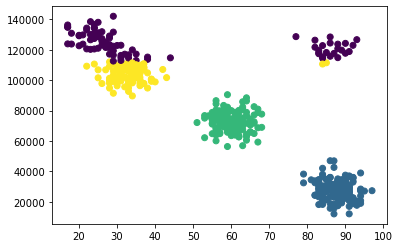

In [216]:
plt.scatter(df['Age'],df['Income'],c=birch_model.labels_)

In [224]:


labels1 = birch_model.labels_
n_clusters_1= len(set(labels)) - (1 if -1 in labels else 0)

n_clusters_1

4

In [226]:
# Identify Noise
n_noise1 = list(labels1).count(-1)
n_noise1

0

In [227]:
# method 3

### Clustering using Hierarchical Clustering
+ Hierarchical Clustering: the process of building a hierarchy or ordering of clusters till only one cluster is left
    
#### Types of Hierarchical Clustering
+ Additive(Agglomerative) hierarchical clustering
    - Agglomerate (merge or join)
    - Assign each point to a cluster
    - Merge/Join closes pairs of clusters into one
    - Repeat until you have a single cluster
    - You keep on adding or joining clusters 

+ Divisive hierarchical clustering
    - Opposite of Additive
    - Start with a single large cluster
    - Divide/Split the farthest point in the cluster
    - Repeat until each cluster only contains a single data point
    
    
#### Terms
+ Similarity Distance
+ Proximity Matrix: it stores the distances between each point
+ Dendogram: used to find the number of clusters
    - A dendrogram is a tree-like diagram that records the sequences of merges or splits.
    - The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold.

#### Agglomerative Hierarchical Clustering
+ Merging clusters
+ Dendogram to detect n_clusters to use and end at

In [228]:
df.head()

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


In [229]:
# normallzation 
from sklearn.preprocessing import normalize

In [230]:
# scale / normal

df_scaled = normalize(df)

df_scaled = pd.DataFrame(df_scaled,columns=df.columns)

df_scaled

,Age,Income,SpendingScore,Savings
0,0.000743,0.996461,0.000010,0.084052
1,0.000720,0.997814,0.000010,0.066087
2,0.000823,0.992416,0.000009,0.122925
3,0.000789,0.995157,0.000010,0.098298
4,0.003552,0.725046,0.000014,0.688692
...,...,...,...,...
500,0.000274,0.989284,0.000004,0.146006
501,0.003465,0.742750,0.000008,0.669559
502,0.002320,0.909904,0.000009,0.414812
503,0.003287,0.747083,0.000013,0.664723


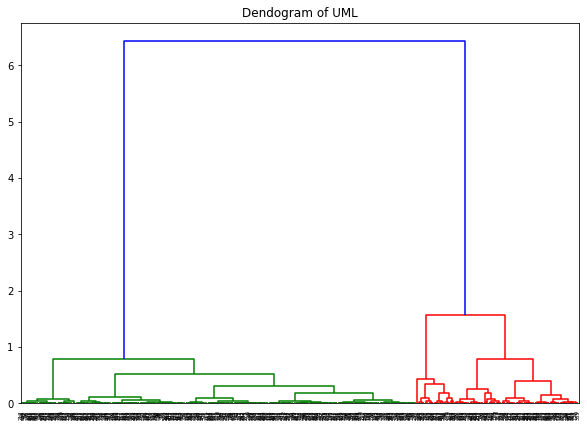

In [231]:
import scipy.cluster.hierarchy as shc


plt.figure(figsize=(10,7))
plt.title("Dendogram of UML")
dend = shc.dendrogram(shc.linkage(df_scaled,method='ward'))

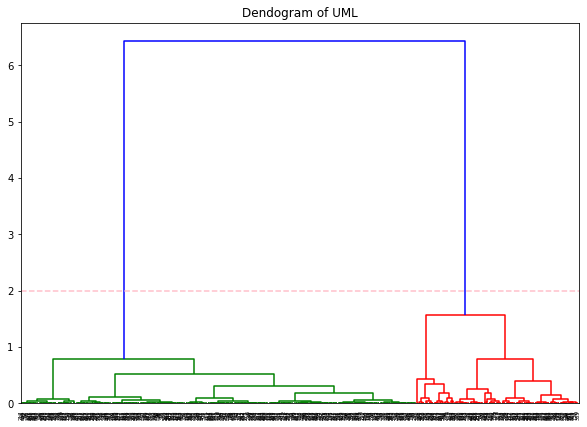

In [233]:
plt.figure(figsize=(10,7))
plt.title("Dendogram of UML")
dend = shc.dendrogram(shc.linkage(df_scaled,method='ward'))
plt.axhline(y=2,color='pink',linestyle='--')

In [235]:
# model buliding

from sklearn.cluster import AgglomerativeClustering

In [236]:
hcluster = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')

In [237]:
Y_clust_hcl = hcluster.fit_predict(df_scaled)

In [238]:
Y_clust_hcl

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,

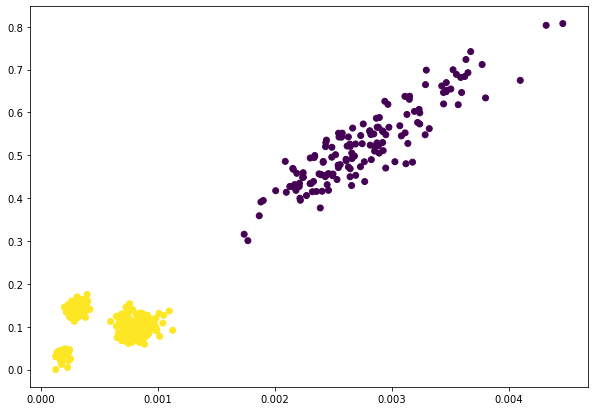

In [240]:
df_scaled['clusters'] = Y_clust_hcl
# Plot
plt.figure(figsize=(10,7))
plt.scatter(df_scaled['Age'],df_scaled['Savings'],c=df_scaled['clusters'])
